In [1]:
#Import necessary packages:
import numpy as np
from NN import layers

#Import the data: AND EXAMPLE:
#stored separately and imported here
# as a matrix of X and a *column vector* for the y's
import NN.data as data

#Wait for this stuff: not ready:
from NN.loss_function import BCE


#plot the loss function:
import matplotlib.pyplot as plt

### Define:

 - the training data, first using the `AND` case
 - the `learning_rate`
 - the `Linear` layer:
 - the classification threshold probability (if $0.50<p\leq 1$, then the model returns `TRUE`)

In [2]:
X_train , y_train = data.split_data(data.d['AND'])
lr=0.01
linear_layer = layers.Linear(num_features=X_train.shape[1], num_neurons=1)
threshold = 0.5

### 1) Input data `X_train` to linear layer:

In [3]:
output = linear_layer.forward(X_train)
output

array([[0.90197968],
       [0.88582843],
       [0.76969979],
       [0.73808144]])

### 1a) Make some predictions.  At first pass through the neural network, these are not meaningful because we haven't made any effort to decrease the loss function.

In [4]:
#"predictions"
#assumed to be meaningless at first pass:
output>threshold

array([[ True],
       [ True],
       [ True],
       [ True]])

In [5]:
#actuals
y_train!= 0

array([[False],
       [False],
       [False],
       [ True]])

### 2) Compute the Binary Cross Entropy Loss:

In [6]:
loss = BCE(y_true=y_train , y_pred = output)
loss

1.5661765206278548

### 3) Compute Gradients

 - The derivations of these gradients is completed in the readme

In [7]:
d_output = output - y_train
dz = d_output * (output) * (1-output)
d_weights = np.dot(X_train.T, dz).T
d_bias = np.mean(dz , axis= 0)

### 4) Update the weights:

In [8]:
linear_layer.weights -= lr*d_weights
linear_layer.bias -= lr*d_bias

### 5) Repeat Steps 1 through 4 a large number of times.  Take note of how the loss function progresses and what happens to prediction accuracy after training is complete:

In [9]:
plot_data = []


for epoch in range(100000):
    #STEP 1:
    output = linear_layer.forward(X_train)
    
    #STEP 2:
    loss = BCE(y_true=y_train , y_pred = output)
    
    #STEP 3:
    d_output = output - y_train
    dz = d_output * (output) * (1-output)
    d_weights = np.dot(X_train.T, dz).T
    d_bias = np.mean(dz , axis= 0)
    
    #STEP 4:

    linear_layer.weights -= lr*d_weights
    linear_layer.bias -= lr*d_bias

    #Give periodic updates on the loss function:
    plot_data.append((epoch,loss))
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        #weights gradient apppears to be getting stuck
        #print(f'd_weights at epoch {epoch}: {d_weights}')

Epoch 0, Loss: 1.5656
Epoch 10000, Loss: 0.3550
Epoch 20000, Loss: 0.2286
Epoch 30000, Loss: 0.1760
Epoch 40000, Loss: 0.1460
Epoch 50000, Loss: 0.1264
Epoch 60000, Loss: 0.1125
Epoch 70000, Loss: 0.1020
Epoch 80000, Loss: 0.0938
Epoch 90000, Loss: 0.0871


### Plot the results of the loss function.  We want to see it decreasing monotonically.

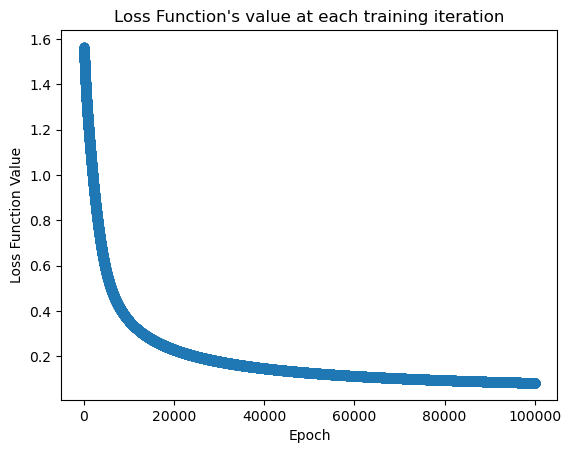

In [10]:
plt.scatter(*zip(*plot_data))
plt.title("Loss Function's value at each training iteration")
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value');

In [11]:
output>threshold

array([[False],
       [False],
       [False],
       [ True]])

In [12]:
y_train!=0

array([[False],
       [False],
       [False],
       [ True]])

This is nice!  The loss function decreases monotonically and the network has learned the `AND` operator with 100% accuracy.  Of course, training this many times is probably unnecessary.  We could improve efficiency and do further analysis to estimate the minimum number of epochs to train the model correctly.